# Road Accident Severity Predictor
### Life Cycle of Project
- Probem Definition
- Data Collection
- Data Preprocessing
- EDA
- Feature Engineering
- Model Selection
- Model Training
- Evaluation
- Deployment
- Monitoring

### Problem Statement
Road accidents are one of the leading causes of death and injury worldwide. The severity of an accident depends on a combination of environmental and infrastructural factors such as light conditions, weather, road type, and vehicle type.
This project aims to develop a machine learning classification model that can predict the severity of an accident as:
- Slight
- Serious
- Fetal (intentionally misspelled for domain-specific reasons, e.g., matching data or a UI display requirement)

This can help:
- Government authorities plan preventive infrastructure.
- Emergency responders prioritize resource allocation.
- General public become more aware of high-risk conditions.

## 1) Import Data and Required Packages

In [1]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization (optional, for EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning Classifiers
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

# Optional: Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## 2) Load Dataset
We begin by importing the dataset Road Accident Data.csv using Pandas. This dataset contains records of road accidents with environmental and road-related features that will be used to predict accident severity.

### First 5 Records
The head() function helps us take a quick look at the first few entries to understand the structure of the dataset.

### Last 5 Records
The tail() function is used to view the last few rows of the dataset. This ensures that there are no missing rows or formatting issues at the bottom.

In [2]:
df=pd.read_csv("Road Accident Data.csv")
df.head()
df.tail()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307968,BS0307969,18/02/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car
307969,BS0307970,21/02/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car
307970,BS0307971,23/02/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car
307971,BS0307972,23/02/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc
307972,BS0307973,28/02/2022,Sunday,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,Highland,Other object on road,...,1,1,Northern,Wet or damp,Dual carriageway,60,15:45,Rural,Snowing no high winds,Car


## 3) Check for Missing Values
Before preprocessing, it's essential to check for null (missing) values in the dataset. Missing data can negatively affect the performance of machine learning models and must be handled properly.

In [3]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions            0
Road_Type                          0
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions                 0
Vehicle_Type                       0
dtype: int64


## 4) Check for Duplicate Records
Duplicate rows can distort the learning process and lead to biased or overfitted models, especially if they’re over-representing certain outcomes.

In [4]:
df.duplicated().sum()

0

## 5) Check Data Types
Before preprocessing, it’s important to understand the structure of the dataset — including data types and missing values.

In [5]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

## 6) Check Number of Unique Values per Column
Understanding how many unique values are present in each column helps identify:
Categorical vs. Numerical features
Columns with low variance (e.g., single-value columns — candidates for removal)
Useful for determining how to encode categorical features (e.g., OneHotEncoding vs LabelEncoding)

In [6]:
df.nunique()

Accident_Index                307973
Accident Date                    730
Day_of_Week                        7
Junction_Control                   7
Junction_Detail                    9
Accident_Severity                  4
Latitude                      264362
Light_Conditions                   5
Local_Authority_(District)       422
Carriageway_Hazards                5
Longitude                     269856
Number_of_Casualties              28
Number_of_Vehicles                17
Police_Force                      51
Road_Surface_Conditions            5
Road_Type                          5
Speed_limit                        8
Time                            1439
Urban_or_Rural_Area                2
Weather_Conditions                 8
Vehicle_Type                      15
dtype: int64

## 7) Summary Statistics using df.describe()

In [7]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


## 8) Selecting Relevant Features & Cleaning Target Column
To reduce noise and focus only on the columns that directly impact your classification model, we filtered the dataset and standardized the target labels.

In [8]:
# Final list of required columns
required_columns = [
    'Junction_Control',
    'Junction_Detail',
    'Light_Conditions',
    'Road_Surface_Conditions',
    'Road_Type',
    'Weather_Conditions',
    'Vehicle_Type',
    'Number_of_Casualties',
    'Number_of_Vehicles',
    'Accident_Severity'  # Target
]

# Filter dataset
df = df[required_columns]

# Check the updated DataFrame
df.head()
df = df.sample(n=50000, random_state=42).reset_index(drop=True)
df['Accident_Severity'] = df['Accident_Severity'].replace("fetal", "fatal")

In [9]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
Junction_Control           0
Junction_Detail            0
Light_Conditions           0
Road_Surface_Conditions    0
Road_Type                  0
Weather_Conditions         0
Vehicle_Type               0
Number_of_Casualties       0
Number_of_Vehicles         0
Accident_Severity          0
dtype: int64


## 9) Checking Unique Categories in Categorical Columns
Before encoding the data, it's important to inspect unique values in each categorical column. This helps us understand the range of categories and check for inconsistencies or typos in the data.

In [10]:
print("Categories in 'Junction_Control':               ", end=" ")
print(df['Junction_Control'].unique())

print("Categories in 'Junction_Detail':                ", end=" ")
print(df['Junction_Detail'].unique())

print("Categories in 'Light_Conditions':               ", end=" ")
print(df['Light_Conditions'].unique())

print("Categories in 'Road_Surface_Conditions':        ", end=" ")
print(df['Road_Surface_Conditions'].unique())

print("Categories in 'Road_Type':                      ", end=" ")
print(df['Road_Type'].unique())

print("Categories in 'Weather_Conditions':             ", end=" ")
print(df['Weather_Conditions'].unique())

print("Categories in 'Vehicle_Type':                   ", end=" ")
print(df['Vehicle_Type'].unique())

print("Categories in 'Accident_Severity':              ", end=" ")
print(df['Accident_Severity'].unique())

Categories in 'Junction_Control':                ['Data missing or out of range' 'Give way or uncontrolled'
 'Auto traffic signal' 'Not at junction or within 20 metres' 'Stop sign'
 'Authorised person' 'Auto traffic sigl']
Categories in 'Junction_Detail':                 ['Not at junction or within 20 metres' 'Roundabout'
 'T or staggered junction' 'Crossroads' 'Mini-roundabout'
 'Private drive or entrance' 'More than 4 arms (not roundabout)'
 'Slip road' 'Other junction']
Categories in 'Light_Conditions':                ['Daylight' 'Darkness - lights lit' 'Darkness - lighting unknown'
 'Darkness - no lighting' 'Darkness - lights unlit']
Categories in 'Road_Surface_Conditions':         ['Dry' 'Wet or damp' 'Snow' 'Frost or ice' 'Flood over 3cm. deep']
Categories in 'Road_Type':                       ['Dual carriageway' 'Roundabout' 'Single carriageway' 'One way street'
 'Slip road']
Categories in 'Weather_Conditions':              ['Fine no high winds' 'Raining no high winds' 'Snowing 

## 10) Splitting Data & Preprocessing Pipeline Setup

In [11]:
X = df.drop("Accident_Severity", axis=1)
y = df["Accident_Severity"]

In [12]:
# Encode Target (if not numeric)
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify Numerical and Categorical Features
num_features = X.select_dtypes(exclude="object").columns.tolist()
cat_features = X.select_dtypes(include="object").columns.tolist()

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

## 11) Training Multiple Models & Evaluating Performance
- evaluate_model() Function
- Handles both classification and regression model evaluation.
- Classification metrics:
  - Accuracy
  - Precision (weighted)
  - Recall (weighted)
  - F1 Score (weighted)
  - Classification report
- Regression metrics:
  - Mean Absolute Error (MAE)
  -Root Mean Squared Error (RMSE)
  -R² Score
- Model Dictionary
- A collection of both regression and classification models:
  - Regression Models: Linear, Lasso, Ridge, KNN, Decision Tree, Random Forest, CatBoost, AdaBoost
  - Classification Models: Logistic Regression, XGBoost
- Model Training Loop
- For each model:
  - A Pipeline is created to combine preprocessing and model training.
  - Trains on X_train and y_train
  - Predicts on X_test
  - Uses evaluate_model() for performance reporting.
- Classification Detection
  -Uses model name/class to dynamically determine if it’s a classifier.

In [13]:
def evaluate_model(name, y_test, y_pred, is_classifier=True):
    print(f"\n Model: {name}")
    if is_classifier:
        accuracy=accuracy_score(y_test, y_pred)
        print("Accuracy       :", accuracy)
        print("Precision      :", precision_score(y_test, y_pred, average="weighted", zero_division=0))
        print("Recall         :", recall_score(y_test, y_pred, average="weighted", zero_division=0))
        print("F1 Score       :", f1_score(y_test, y_pred, average="weighted", zero_division=0))
        print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        return accuracy
    else:
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        print("MAE            :", mae)
        print("RMSE           :", rmse)
        print("R2 Score       :", r2)
        return r2

In [14]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False),
    "AdaBoost": AdaBoostRegressor(),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
}


for name, model in models.items():
    clf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Handle multi-output predictions
    if hasattr(y_pred, "shape") and len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    # Determine whether it's a classifier or regressor
    is_classifier = "Classifier" in model.__class__.__name__ or "Logistic" in name or "XGBoost" in name

    if is_classifier:
        evaluate_model(name, y_test, y_pred, is_classifier=True)
    else:
        r2 = evaluate_model(name, y_test, y_pred, is_classifier=False)
    print("=" * 60)


 Model: Linear Regression
MAE            : 0.28503745696494887
RMSE           : 0.4622098930940572
R2 Score       : 0.029619569156746905

 Model: Lasso
MAE            : 0.29233631999999987
RMSE           : 0.46921108256306143
R2 Score       : -1.816868719917153e-07

 Model: Ridge
MAE            : 0.2850366806084176
RMSE           : 0.46221010638683085
R2 Score       : 0.02961867356716974

 Model: K-Neighbors Regressor
MAE            : 0.29184000000000004
RMSE           : 0.5009590801652367
R2 Score       : -0.13990343342765899

 Model: Decision Tree
MAE            : 0.2828933535894896
RMSE           : 0.511206258977589
R2 Score       : -0.1870141089751578

 Model: Random Forest
MAE            : 0.2835962796741575
RMSE           : 0.4814967998950609
R2 Score       : -0.05305333104340182

 Model: CatBoost
MAE            : 0.28109815514585906
RMSE           : 0.4628314532132111
R2 Score       : 0.027007962048097967

 Model: AdaBoost
MAE            : 0.4433228197724529
RMSE           : 0.

## 12) Accident Severity Prediction Using XGBoost
This code builds a machine learning model to predict road accident severity using the XGBoost classifier. It starts by loading the dataset and cleaning the target labels by replacing 'Fatal' with 'Fetal'. Then, it selects important features like road type, weather, and vehicle type. These features are converted into numeric format using one-hot encoding, and the target variable is label encoded.

The dataset is split into training and testing sets. An XGBoost model is trained with specific parameters for multi-class classification. After training, the model, feature columns, and label encoder are saved using joblib for future use. Finally, the model's accuracy is evaluated and printed using the test data.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("Road Accident Data.csv")

# Replace 'Fatal' with 'Fetal'
df['Accident_Severity'] = df['Accident_Severity'].replace('Fatal', 'Fetal')

# Features and target
features = [
    'Junction_Control',
    'Junction_Detail',
    'Light_Conditions',
    'Road_Surface_Conditions',
    'Road_Type',
    'Weather_Conditions',
    'Vehicle_Type'
]
target = 'Accident_Severity'

# Encode input features
X = pd.get_dummies(df[features])

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df[target])

# Save column names and label encoder
joblib.dump(X.columns.tolist(), "model_columns.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100
)

model.fit(X_train, y_train)

# Save model
joblib.dump(model, "xgboost_classification_model.pkl")
print("XGBoost multiclass classification model saved successfully.")

# Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

XGBoost multiclass classification model saved successfully.
Accuracy: 0.8548908190599886


# Conclusion and Outcomes
The developed machine learning pipeline successfully predicts the severity of road accidents based on various environmental and road-related features like road type, lighting, vehicle type, weather, etc. Using the XGBoost Classifier, the model performs multi-class classification and achieves a measurable accuracy score, indicating its ability to generalize on unseen data.

## Key Outcomes:
- Data was preprocessed with categorical encoding and label encoding for model readiness.
- The XGBoost model was trained effectively for multi-class classification.
- The trained model, label encoder, and feature columns were saved for deployment and future use.
- The final model’s accuracy was printed to evaluate its performance.

This system can assist authorities or analysts in understanding accident patterns and improving road safety measures based on predicted severity.

# Visualization
## 1. Accident Severity Count Plot
Shows how frequent each severity level (e.g., Slight, Serious, Fetal) is in the dataset. Helps identify class imbalance.

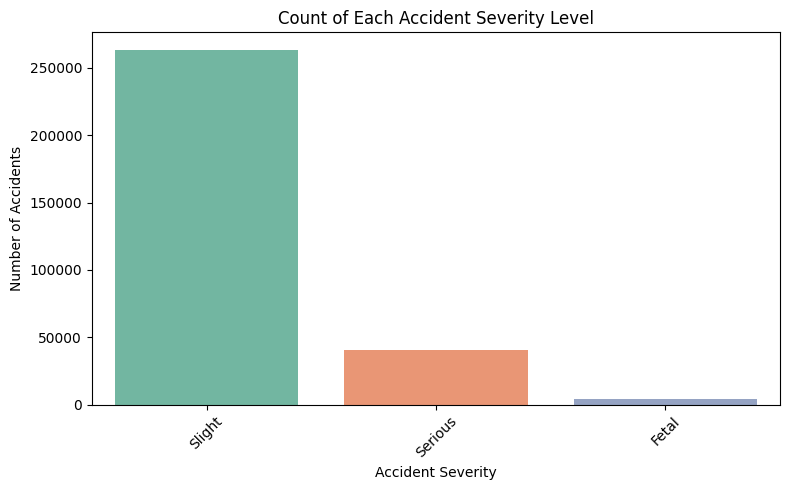

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', data=df, order=df['Accident_Severity'].value_counts().index, palette='Set2')
plt.title("Count of Each Accident Severity Level")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Accident Severity by Weather Conditions
Reveals how different weather conditions (e.g., Rain, Fog, Fine) affect the severity of accidents.

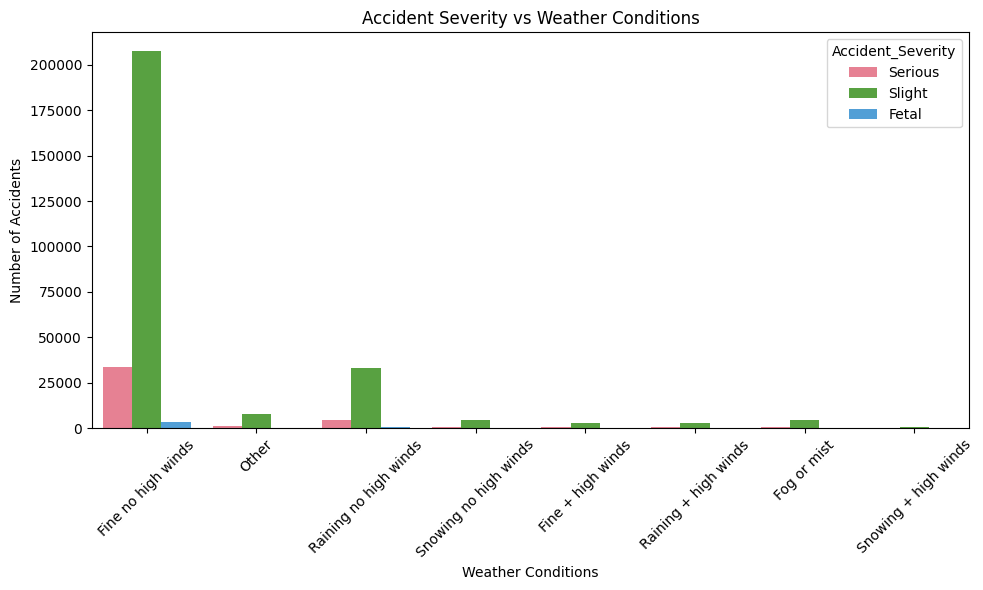

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather_Conditions', hue='Accident_Severity', palette='husl')
plt.title("Accident Severity vs Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Accident Severity by Road Surface Conditions
Shows which road surface conditions (e.g., Wet, Dry, Snow) are more likely to be associated with serious accidents.

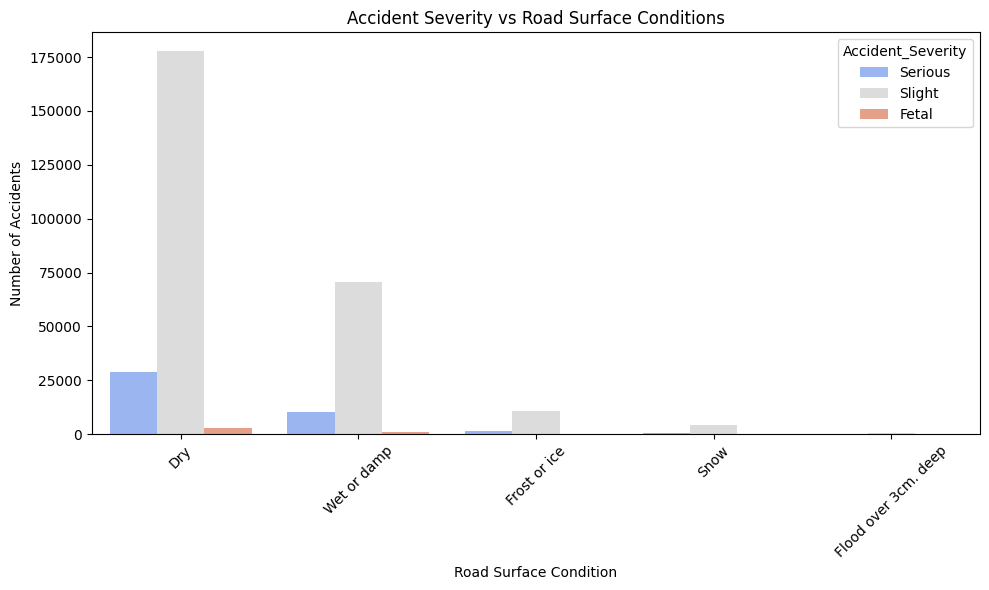

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Road_Surface_Conditions', hue='Accident_Severity', palette='coolwarm')
plt.title("Accident Severity vs Road Surface Conditions")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Accident Severity by Light Conditions
Helps understand how light (Daylight, Darkness with/without lighting) influences accident severity.

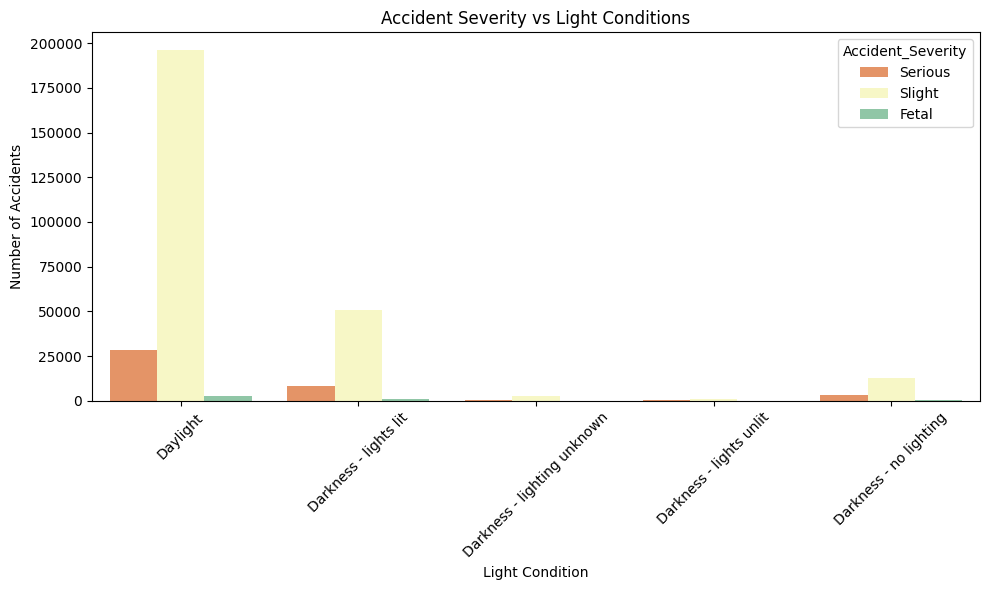

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Light_Conditions', hue='Accident_Severity', palette='Spectral')
plt.title("Accident Severity vs Light Conditions")
plt.xlabel("Light Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Heatmap of Correlation (for numeric columns)
Displays correlation between numerical features (if any). Useful to detect multicollinearity.

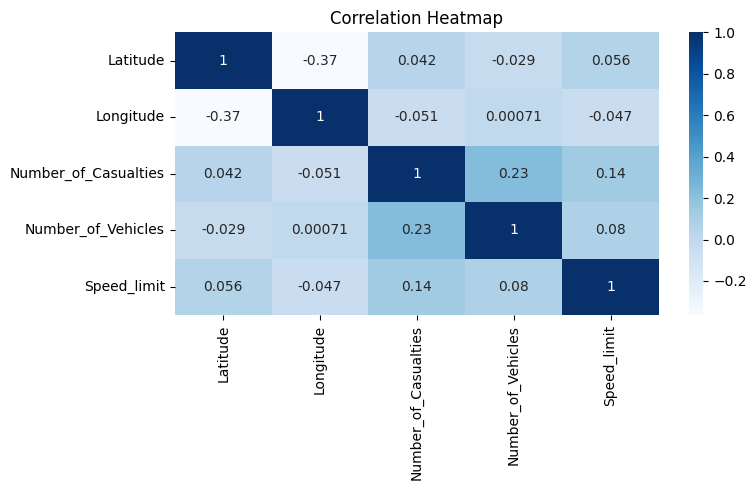

In [20]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## 6. Pie Chart of Road Type Distribution
Shows percentage of accidents happening on different road types (e.g., Single carriageway, Dual carriageway).

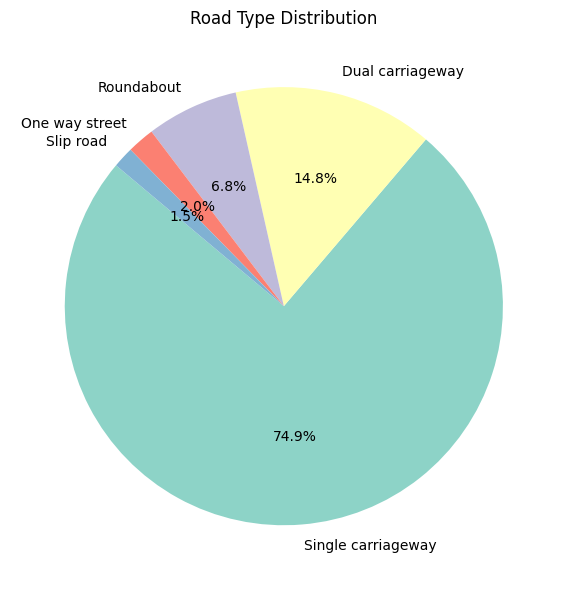

In [21]:
road_type_counts = df['Road_Type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(road_type_counts, labels=road_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Road Type Distribution")
plt.tight_layout()
plt.show()

## 7. Bar Plot: Vehicle Type vs Accident Severity
Analyzes which vehicle types (e.g., Car, Motorcycle, Van) are involved in more serious or fatal accidents.

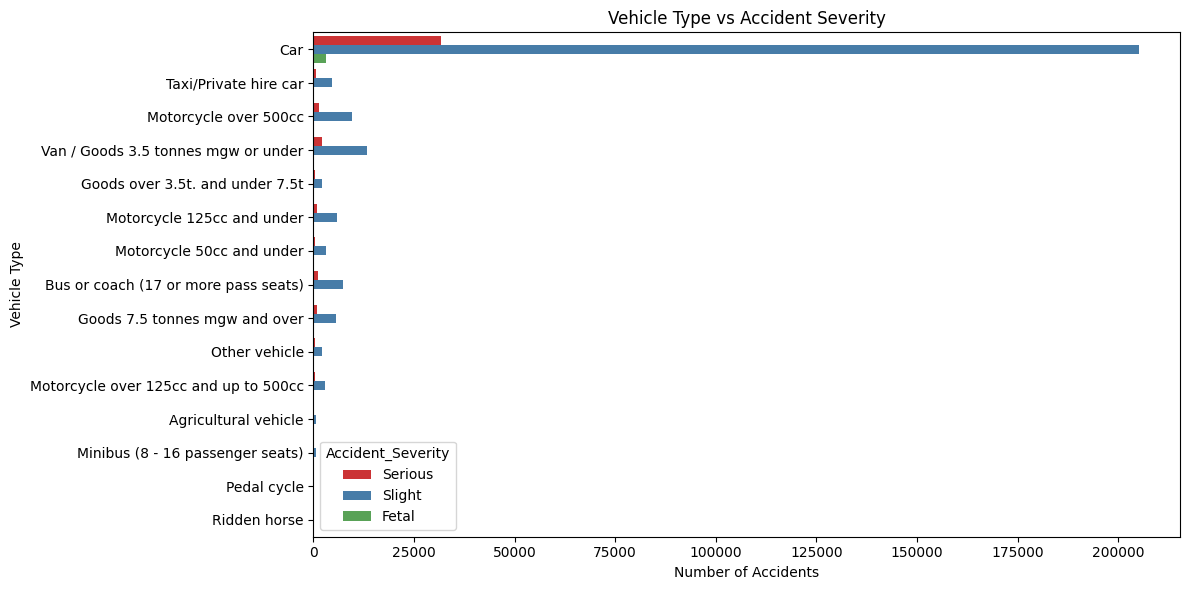

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Vehicle_Type', hue='Accident_Severity', palette='Set1')
plt.title("Vehicle Type vs Accident Severity")
plt.xlabel("Number of Accidents")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

## 8. Accidents per Day of the Week
Identifies which days have the highest number of accidents. Useful for weekly trend analysis.

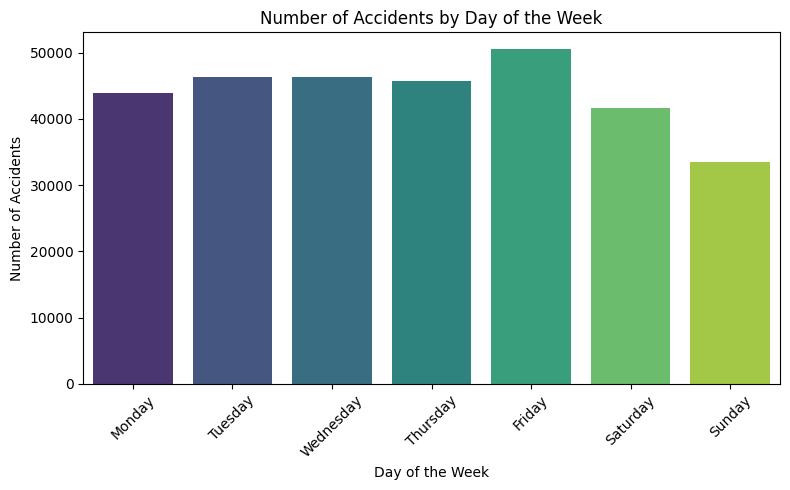

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Day_of_Week', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title("Number of Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Accidents per Hour
Shows accident frequency by hour—often useful to see peak accident hours (e.g., rush hours).

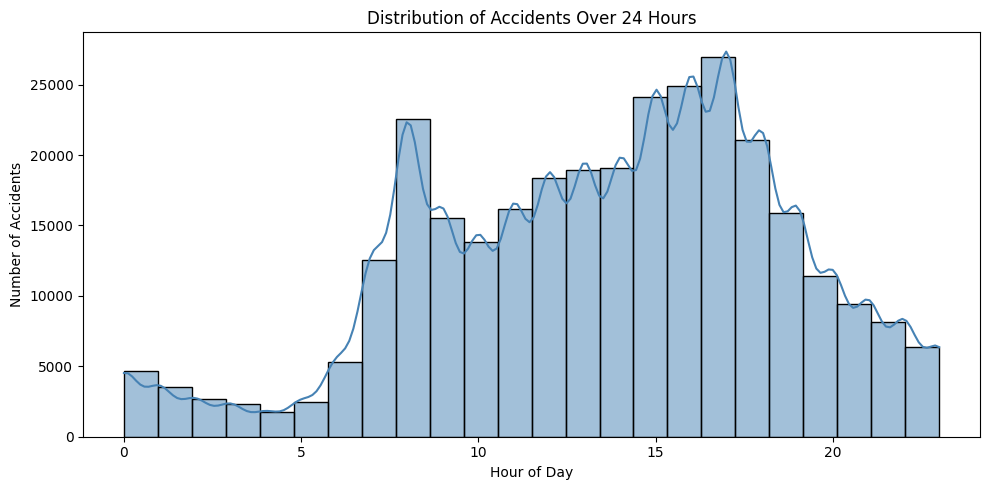

In [24]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Hour'] = df['Time'].dt.hour

plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=True, color='steelblue')
plt.title("Distribution of Accidents Over 24 Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

## 10. Junction Control vs Accident Severity
Examines how the presence or absence of traffic signals or signs impacts accident severity.

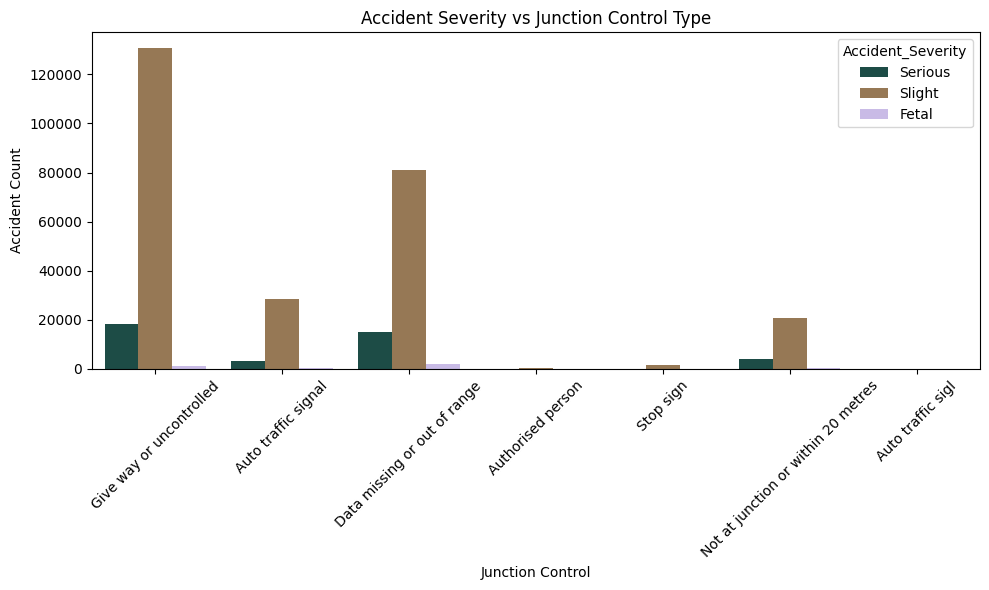

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Junction_Control', hue='Accident_Severity', palette='cubehelix')
plt.title("Accident Severity vs Junction Control Type")
plt.xlabel("Junction Control")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 11. Pairplot of Selected Numeric Features
Visualizes pairwise relationships among numeric features like casualties and speed limit to detect patterns or outliers.

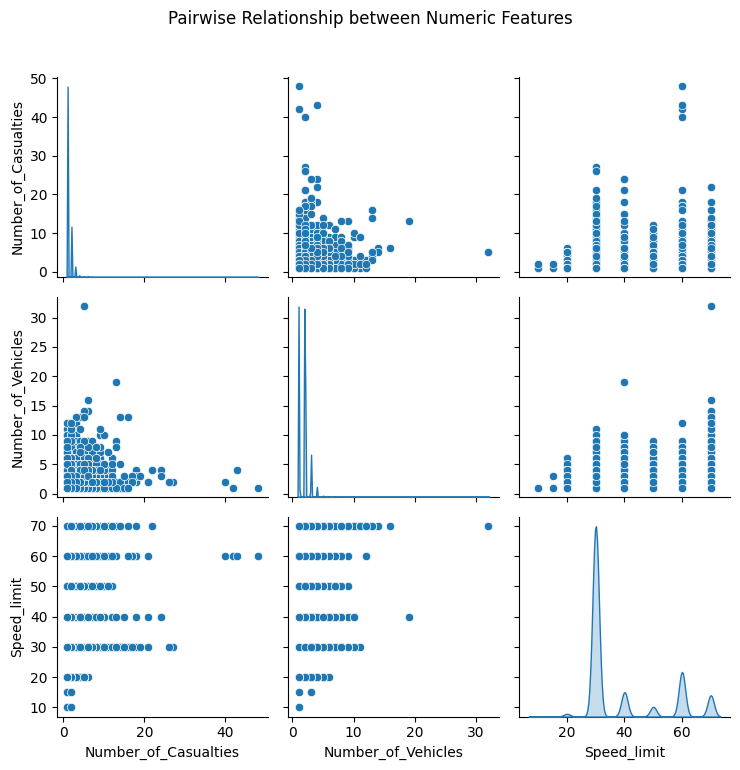

In [26]:
sns.pairplot(df[['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']], diag_kind='kde')
plt.suptitle("Pairwise Relationship between Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

## 12. Top 10 Most Frequent Weather Conditions
Displays the most common weather conditions recorded during accidents.

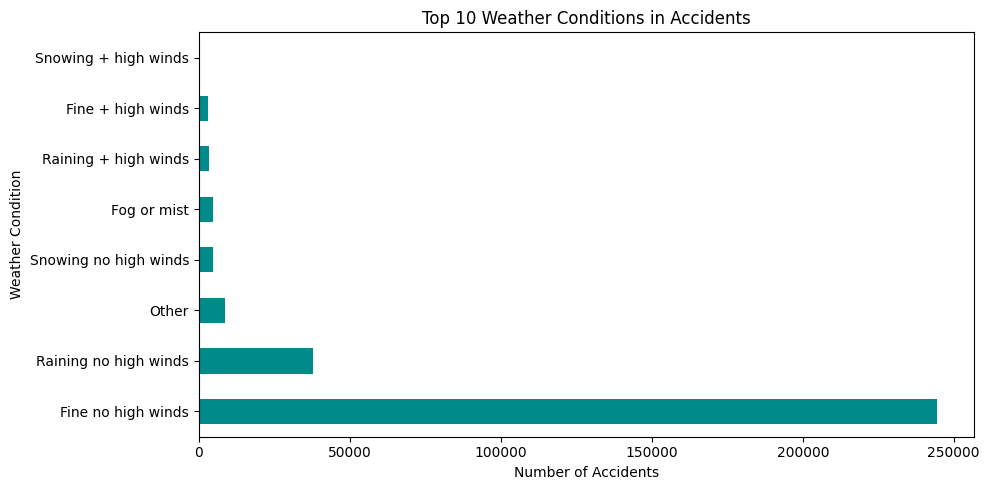

In [27]:
plt.figure(figsize=(10, 5))
df['Weather_Conditions'].value_counts().head(10).plot(kind='barh', color='darkcyan')
plt.title("Top 10 Weather Conditions in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

## 13. Proportion of Each Severity Level (Pie Chart)
Pie chart shows the overall distribution of severity levels for all accidents.

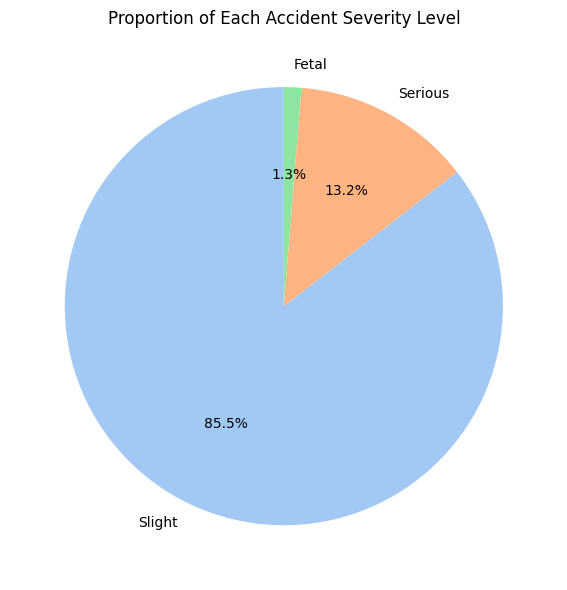

In [28]:
plt.figure(figsize=(6, 6))
df['Accident_Severity'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Proportion of Each Accident Severity Level")
plt.ylabel("")
plt.tight_layout()
plt.show()

## 14. Crosstab Heatmap of Road Type vs Vehicle Type
A matrix showing the count of different vehicle types involved in accidents across various road types.

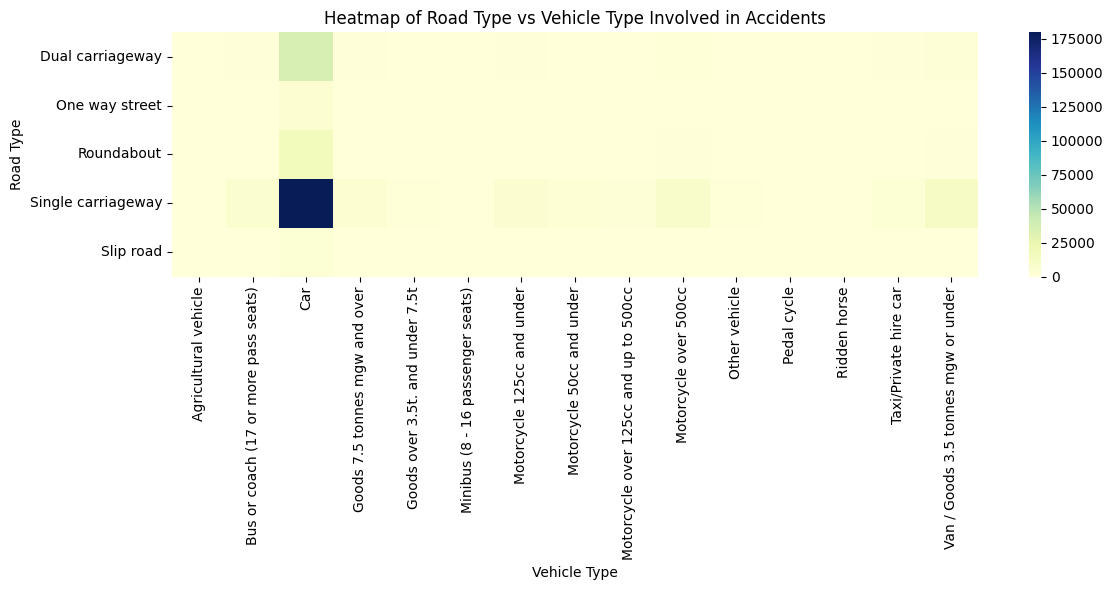

In [29]:
cross_tab = pd.crosstab(df['Road_Type'], df['Vehicle_Type'])

plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=False)
plt.title("Heatmap of Road Type vs Vehicle Type Involved in Accidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Road Type")
plt.tight_layout()
plt.show()

## 15. Accident Severity by Speed Limit
Helps identify if higher speed zones are associated with more severe accidents.

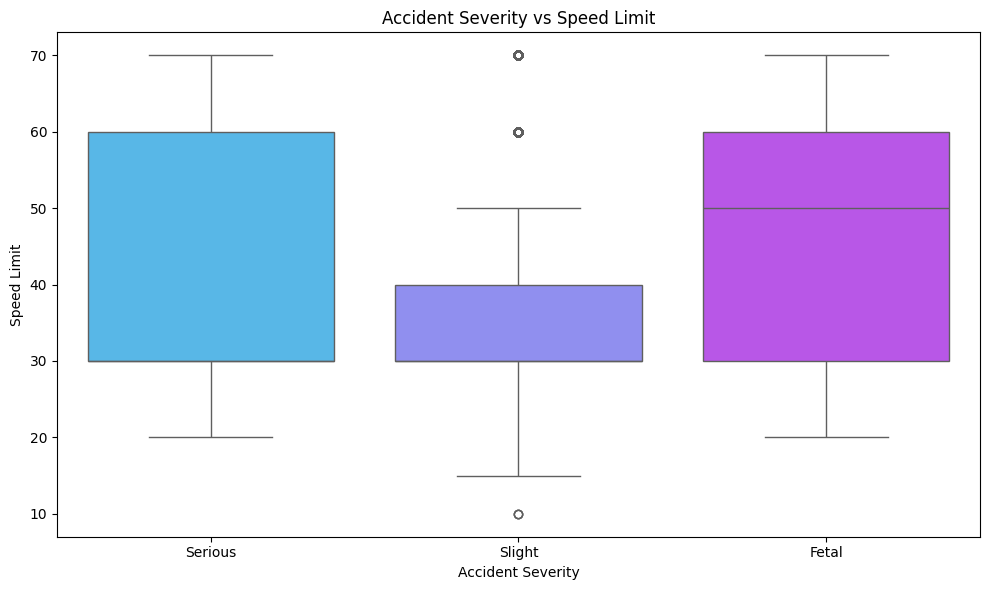

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_Severity', y='Speed_limit', data=df, palette='cool')
plt.title("Accident Severity vs Speed Limit")
plt.xlabel("Accident Severity")
plt.ylabel("Speed Limit")
plt.tight_layout()
plt.show()